In [28]:
%pwd
%rm -rf cats_and_dogs
%rm cats_and_dogs.zip
%rm -rf __MACOSX/cats_and_dogs
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [29]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.695.jpg  
  inflating: cats_and_dogs/tr

In [30]:
# 3
%cd cats_and_dogs/test/
%mkdir classes
%mv * classes
%cd ../..
train_image_generator = ImageDataGenerator(rescale=True)
validation_image_generator = ImageDataGenerator(rescale=True)
test_image_generator = ImageDataGenerator(rescale=True)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir, target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size);
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir, target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size
);
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir, target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=batch_size, shuffle=False
)

/content/cats_and_dogs/test
mv: cannot move 'classes' to a subdirectory of itself, 'classes/classes'
/content
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [40]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
print(sample_training_images[:5])
#plotImages(sample_training_images[:5])


[[[[138.22023  103.46193   65.389175]
   [123.76097   93.579895  54.02659 ]
   [108.63319   84.5047    43.176254]
   ...
   [ 41.915676  38.915676  23.081947]
   [ 39.89551   36.89551   20.253717]
   [ 43.498604  40.273674  21.474232]]

  [[122.312294  92.853874  52.33323 ]
   [109.748474  85.722824  44.54138 ]
   [102.08468   83.80366   42.066956]
   ...
   [ 39.64069   36.608658  19.35238 ]
   [ 47.721348  44.28528   23.796741]
   [ 55.802002  51.961903  28.241102]]

  [[109.09611   83.79387   41.25768 ]
   [ 98.97167   81.47945   40.93517 ]
   [ 94.343185  82.343185  41.53339 ]
   ...
   [ 51.94409   48.296886  26.11925 ]
   [ 59.35866   55.20495   30.153711]
   [ 62.18689   56.82108   31.36581 ]]

  ...

  [[143.14     143.14     132.82465 ]
   [116.44907  116.44907  106.196   ]
   [ 91.108864  92.09725   81.34401 ]
   ...
   [107.54044  107.54044   73.54044 ]
   [108.       108.        74.      ]
   [108.       108.        74.      ]]

  [[135.70973  135.70973  125.69253 ]
   [116

In [32]:
# 5
train_image_generator = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=20,
    height_shift_range=10,
    shear_range=.2,
    zoom_range=.3,
    rescale=False)


Found 2000 images belonging to 2 classes.


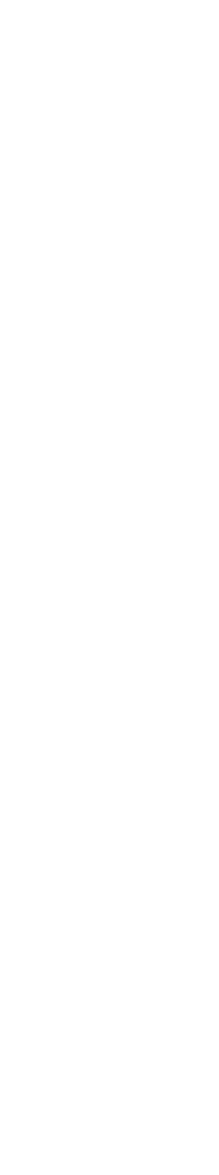

In [33]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [35]:
# 7
model = Sequential()

model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16,activation='sigmoid'))
# Using 3 here as the typical shape for window-size in a convolutional neural network
# Recall that we are grabbing windows of our image and seeking patterns in those
model.add(Conv2D(35,3))
model.add(MaxPooling2D(20))
model.add(Flatten())
# This final layer should be 1, because it's a binary output
# Online says that relu should only be used for hidden layers, while sigmoid is optimal for binary classification.
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# 8
history = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen);

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.4892 - loss: 0.2583 - val_accuracy: 0.5000 - val_loss: 0.2500
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.5171 - loss: 0.2498 - val_accuracy: 0.5000 - val_loss: 0.2501
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.5009 - loss: 0.2499 - val_accuracy: 0.5000 - val_loss: 0.2518
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.4811 - loss: 0.2513 - val_accuracy: 0.5000 - val_loss: 0.2505
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.5018 - loss: 0.2510 - val_accuracy: 0.5000 - val_loss: 0.2504
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.4727 - loss: 0.2527 - val_accuracy: 0.5000 - val_loss: 0.2509
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.5160 - loss: 0.2486 - val_accuracy: 0.5000 - val_loss: 0.2545
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.5330 - loss: 0.2494 - val_accuracy: 0.5000 - val_loss:

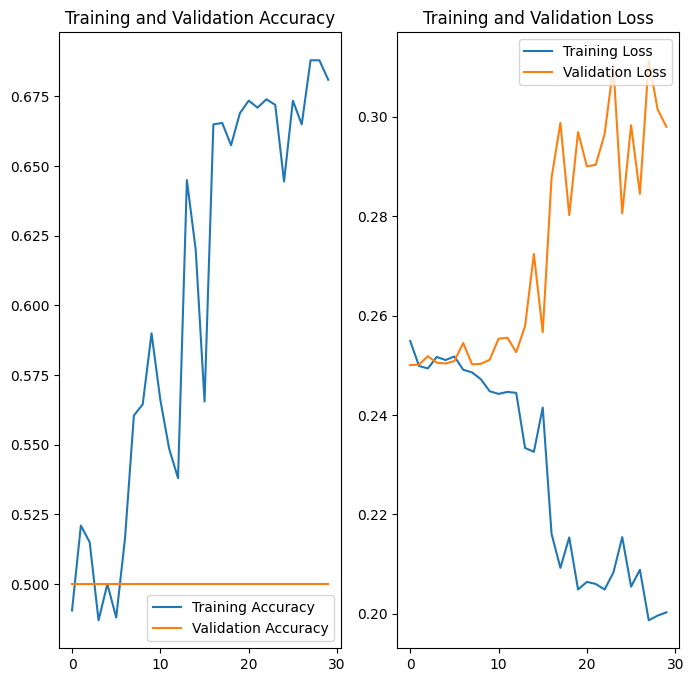

In [37]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
# 10
probabilities = model.predict(test_data_gen)
probabilities=probabilities.squeeze()
#print(probabilities)

#augmented_images1 = [train_data_gen[0][0][0] for i in range(50)]
#plotImages(augmented_images1,probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


In [39]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
